In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [24]:
#aqui va la conexion al sql (postgress)
df = pd.read_csv("../datos/Iris.csv")
df.columns = [i.lower() for i in df.columns]
df = df.reset_index()
df = df.rename(columns={"index":'id'})

In [26]:
df.to_csv("iris.csv",index=False)

<AxesSubplot:xlabel='sepallengthcm', ylabel='petallengthcm'>

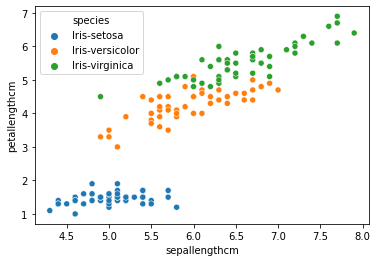

In [23]:
sns.scatterplot(x="sepallengthcm",y="petallengthcm",hue="species",data=df)

In [55]:
dic = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

df["species_codi"]  = df["species"].map(dic)
X                   = df[["sepallengthcm","petallengthcm"]]
y                   = df["species_codi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., random_state=0)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



,Iris-setosa,Iris-versicolor,Iris-virginica,accuracy,macro avg,weighted avg
precision,1.0,0.928571,1.000000,0.966667,0.976190,0.969048
recall,1.0,1.000000,0.833333,0.966667,0.944444,0.966667
f1-score,1.0,0.962963,0.909091,0.966667,0.957351,0.965769
support,11.0,13.000000,6.000000,0.966667,30.000000,30.000000


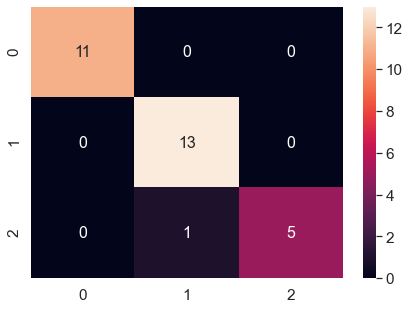

In [77]:
#random forest
clf                 = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred              = clf.predict(X_test)
#xgboost
xgb                 = xg.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb          = xgb.predict(X_test)


target_names        = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(y_test, y_pred, target_names=target_names))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_xgb))
sns.set(font_scale=1.4,rc={'figure.figsize':(7,5)}) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

pd.DataFrame(classification_report(y_test, y_pred_xgb, target_names=target_names, output_dict=True))
